In [545]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RANDOMSEED = 42
MIN = 20
K = 10
DATAPATH = "groceries.csv"
rng = np.random.default_rng(RANDOMSEED)

In [546]:
data = pd.read_csv(DATAPATH, header = None)

In [547]:
data.head()

,0,1,2,3
0,citrus fruit,semi-finished bread,margarine,ready soups
1,tropical fruit,yogurt,coffee,NaN
2,whole milk,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads
4,other vegetables,whole milk,condensed milk,long life bakery product


In [548]:
data.describe()

,0,1,2,3
count,4472,2820,1562,669
unique,144,132,128,96
top,whole milk,rolls/buns,soda,shopping bags
freq,481,221,115,81


In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472 entries, 0 to 4471
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4472 non-null   object
 1   1       2820 non-null   object
 2   2       1562 non-null   object
 3   3       669 non-null    object
dtypes: object(4)
memory usage: 139.9+ KB


In [550]:

print(' \nSchema: Columns are non-ordered items from a single transaction list(a row)\n        Data types are all objects\n        Sample Values: whole milk, shopping bags, soda, rolls/buns\n        Each row represents one transaction list\n'
)

 
Schema: Columns are non-ordered items from a single transaction list(a row)
        Data types are all objects
        Sample Values: whole milk, shopping bags, soda, rolls/buns
        Each row represents one transaction list



In [551]:
data["item_1"] = data[0]
data["item_2"] = data[1]
data["item_3"] = data[2]
data["item_4"] = data[3]
data.drop(columns = 0, inplace = True)
data.drop(columns = 1, inplace = True)
data.drop(columns = 2, inplace = True)
data.drop(columns = 3, inplace = True)

In [552]:
data

,item_1,item_2,item_3,item_4
0,citrus fruit,semi-finished bread,margarine,ready soups
1,tropical fruit,yogurt,coffee,NaN
2,whole milk,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads
4,other vegetables,whole milk,condensed milk,long life bakery product
...,...,...,...,...
4467,frozen meals,NaN,NaN,NaN
4468,newspapers,NaN,NaN,NaN
4469,yogurt,long life bakery product,NaN,NaN
4470,ice cream,long life bakery product,specialty chocolate,specialty bar


In [553]:
def sort_row(row):
    vals = [x for x in row if pd.notna(x)]
    vals = sorted(vals, key=lambda s: s.lower())
    vals += [pd.NA] * (len(row) - len(vals))
    return pd.Series(vals, index=row.index)

data = data.apply(sort_row, axis=1)


In [554]:
data

,item_1,item_2,item_3,item_4
0,citrus fruit,margarine,ready soups,semi-finished bread
1,coffee,tropical fruit,yogurt,<NA>
2,whole milk,<NA>,<NA>,<NA>
3,cream cheese,meat spreads,pip fruit,yogurt
4,condensed milk,long life bakery product,other vegetables,whole milk
...,...,...,...,...
4467,frozen meals,<NA>,<NA>,<NA>
4468,newspapers,<NA>,<NA>,<NA>
4469,long life bakery product,yogurt,<NA>,<NA>
4470,ice cream,long life bakery product,specialty bar,specialty chocolate


In [555]:
dic = {"Columns":"item_1, item_2, item_3, item_4", "Types": "Objects", "Meaning": "Four items on the transaction list"}

In [556]:
items = data.filter(like = "item").stack(dropna = True).rename("items").reset_index(level=1, drop = True)

/var/folders/11/lpg0vvp502x5n18lyjj0251r0000gp/T/ipykernel_55990/1504433501.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  items = data.filter(like = "item").stack(dropna = True).rename("items").reset_index(level=1, drop = True)


In [557]:
transaction_num = len(data)
print(f"There are {transaction_num} transactions")

There are 4472 transactions


In [558]:
num_unique = items.nunique()
print(f"There are {num_unique} unique products")

There are 151 unique products


In [559]:
basket_sizes = data.filter(like="item").notna().sum(axis=1)
print(f"The min basket size is {basket_sizes.min()}")
print(f"The median basket size is {basket_sizes.median()}")
print(f"The 95th percentile of the basket size is {basket_sizes.quantile(0.95)}")

The min basket size is 1
The median basket size is 2.0
The 95th percentile of the basket size is 4.0


In [560]:
t_min = items.value_counts().head(MIN)
t_min

items
whole milk               726
soda                     616
rolls/buns               589
other vegetables         421
yogurt                   339
bottled water            301
pastry                   258
newspapers               240
tropical fruit           211
shopping bags            207
citrus fruit             187
root vegetables          184
coffee                   177
pip fruit                162
fruit/vegetable juice    158
brown bread              153
whipped/sour cream       149
frankfurter              144
chocolate                138
specialty chocolate      124
Name: count, dtype: int64

In [561]:
import re

def standardize_item(x):
    if isinstance(x, str):
        x = x.strip().lower()
        return re.sub(r"\s+", "_", x)
    return x

data = data.applymap(standardize_item)


/var/folders/11/lpg0vvp502x5n18lyjj0251r0000gp/T/ipykernel_55990/950464325.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(standardize_item)


In [562]:
data

,item_1,item_2,item_3,item_4
0,citrus_fruit,margarine,ready_soups,semi-finished_bread
1,coffee,tropical_fruit,yogurt,<NA>
2,whole_milk,<NA>,<NA>,<NA>
3,cream_cheese,meat_spreads,pip_fruit,yogurt
4,condensed_milk,long_life_bakery_product,other_vegetables,whole_milk
...,...,...,...,...
4467,frozen_meals,<NA>,<NA>,<NA>
4468,newspapers,<NA>,<NA>,<NA>
4469,long_life_bakery_product,yogurt,<NA>,<NA>
4470,ice_cream,long_life_bakery_product,specialty_bar,specialty_chocolate


In [563]:
data = data.assign(basket_size = basket_sizes)

In [564]:
zero_cols = data['basket_size'] == 0
zero_cols.sum()

np.int64(0)

In [565]:
data = data.loc[basket_sizes >= 2].reset_index(drop=True)

In [566]:
basket_size = data["basket_size"]

In [567]:
data

,item_1,item_2,item_3,item_4,basket_size
0,citrus_fruit,margarine,ready_soups,semi-finished_bread,4
1,coffee,tropical_fruit,yogurt,<NA>,3
2,cream_cheese,meat_spreads,pip_fruit,yogurt,4
3,condensed_milk,long_life_bakery_product,other_vegetables,whole_milk,4
4,cereals,whole_milk,<NA>,<NA>,2
...,...,...,...,...,...
2815,newspapers,pastry,<NA>,<NA>,2
2816,bottled_water,curd,whole_milk,<NA>,3
2817,bottled_water,frozen_meals,whole_milk,yogurt,4
2818,long_life_bakery_product,yogurt,<NA>,<NA>,2


In [568]:
items = data.filter(like = "item").stack(dropna = True).rename("items").reset_index(level=1, drop = True)

/var/folders/11/lpg0vvp502x5n18lyjj0251r0000gp/T/ipykernel_55990/1504433501.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  items = data.filter(like = "item").stack(dropna = True).rename("items").reset_index(level=1, drop = True)


In [569]:
transactions = items.groupby(level=0).apply(list).rename("items").reset_index()

In [570]:
transactions.rename(columns = {"index":"transaction_id"}, inplace = True)

In [571]:
transactions['basket_size'] = basket_size

In [572]:
transactions

,transaction_id,items,basket_size
0,0,"[citrus_fruit, margarine, ready_soups, semi-fi...",4
1,1,"[coffee, tropical_fruit, yogurt]",3
2,2,"[cream_cheese, meat_spreads, pip_fruit, yogurt]",4
3,3,"[condensed_milk, long_life_bakery_product, oth...",4
4,4,"[cereals, whole_milk]",2
...,...,...,...
2815,2815,"[newspapers, pastry]",2
2816,2816,"[bottled_water, curd, whole_milk]",3
2817,2817,"[bottled_water, frozen_meals, whole_milk, yogurt]",4
2818,2818,"[long_life_bakery_product, yogurt]",2


In [573]:
transactions.to_parquet("outputs/transactions_clean.parquet")

In [574]:
uni = pd.unique(data.drop(columns='basket_size').values.ravel())
uni = [x for x in uni if pd.notna(x)]
len(uni)

146

In [575]:
price_dic = {}
for i in uni:
    price_dic[i] = round(rng.uniform(0.5, 15.0),2)

In [576]:
prices = pd.Series(price_dic).rename_axis("product").reset_index(name="price")

In [577]:
prices

,product,price
0,citrus_fruit,11.72
1,margarine,6.86
2,ready_soups,12.95
3,semi-finished_bread,10.61
4,coffee,1.87
...,...,...
141,cream,7.62
142,hair_spray,14.10
143,soap,8.79
144,kitchen_towels,7.37


In [621]:
prices.to_csv("outputs/product_prices.csv ")

In [579]:
for col in ["item_1", "item_2", "item_3", "item_4"]:
    data[f"{col}_price"] = data[col].map(price_dic)

In [580]:
for col in ["item_1", "item_2", "item_3", "item_4"]:
    data[f"{col}_price"] = data[col].map(price_dic)
data["basket_total"] = data[[f"{c}_price" for c in ["item_1", "item_2", "item_3", "item_4"]]].sum(axis=1, skipna=True)

In [581]:
transactions['basket_total'] = data['basket_total']
transactions

,transaction_id,items,basket_size,basket_total
0,0,"[citrus_fruit, margarine, ready_soups, semi-fi...",4,42.14
1,1,"[coffee, tropical_fruit, yogurt]",3,28.06
2,2,"[cream_cheese, meat_spreads, pip_fruit, yogurt]",4,32.83
3,3,"[condensed_milk, long_life_bakery_product, oth...",4,42.09
4,4,"[cereals, whole_milk]",2,19.36
...,...,...,...,...
2815,2815,"[newspapers, pastry]",2,17.43
2816,2816,"[bottled_water, curd, whole_milk]",3,22.95
2817,2817,"[bottled_water, frozen_meals, whole_milk, yogurt]",4,38.64
2818,2818,"[long_life_bakery_product, yogurt]",2,25.48


In [586]:
transactions.to_csv('outputs/transactions_priced.csv')

In [587]:
data

,item_1,item_2,item_3,item_4,basket_size,item_1_price,item_2_price,item_3_price,item_4_price,basket_total,items
0,citrus_fruit,margarine,ready_soups,semi-finished_bread,4,11.72,6.86,12.95,10.61,42.14,"[citrus_fruit, margarine, ready_soups, semi-fi..."
1,coffee,tropical_fruit,yogurt,<NA>,3,1.87,14.65,11.54,NaN,28.06,"[coffee, tropical_fruit, yogurt]"
2,cream_cheese,meat_spreads,pip_fruit,yogurt,4,11.90,2.36,7.03,11.54,32.83,"[cream_cheese, meat_spreads, pip_fruit, yogurt]"
3,condensed_milk,long_life_bakery_product,other_vegetables,whole_milk,4,5.88,13.94,9.84,12.43,42.09,"[condensed_milk, long_life_bakery_product, oth..."
4,cereals,whole_milk,<NA>,<NA>,2,6.93,12.43,NaN,NaN,19.36,"[cereals, whole_milk]"
...,...,...,...,...,...,...,...,...,...,...,...
2815,newspapers,pastry,<NA>,<NA>,2,5.64,11.79,NaN,NaN,17.43,"[newspapers, pastry]"
2816,bottled_water,curd,whole_milk,<NA>,3,7.27,3.25,12.43,NaN,22.95,"[bottled_water, curd, whole_milk]"
2817,bottled_water,frozen_meals,whole_milk,yogurt,4,7.27,7.40,12.43,11.54,38.64,"[bottled_water, frozen_meals, whole_milk, yogurt]"
2818,long_life_bakery_product,yogurt,<NA>,<NA>,2,13.94,11.54,NaN,NaN,25.48,"[long_life_bakery_product, yogurt]"


In [588]:
transactions

,transaction_id,items,basket_size,basket_total
0,0,"[citrus_fruit, margarine, ready_soups, semi-fi...",4,42.14
1,1,"[coffee, tropical_fruit, yogurt]",3,28.06
2,2,"[cream_cheese, meat_spreads, pip_fruit, yogurt]",4,32.83
3,3,"[condensed_milk, long_life_bakery_product, oth...",4,42.09
4,4,"[cereals, whole_milk]",2,19.36
...,...,...,...,...
2815,2815,"[newspapers, pastry]",2,17.43
2816,2816,"[bottled_water, curd, whole_milk]",3,22.95
2817,2817,"[bottled_water, frozen_meals, whole_milk, yogurt]",4,38.64
2818,2818,"[long_life_bakery_product, yogurt]",2,25.48


In [589]:
data['items'] = transactions['items']

In [590]:
from itertools import combinations

def count_pair_row(row):
    pairs = list(combinations(sorted(set(row)),2))
    return pairs
    
def count_tripe_row(row):
    triples = list(combinations(sorted(set(row)),3))
    return triples

data['pairs'] = data['items'].map(count_pair_row, na_action = 'ignore')
data['triples'] = data['items'].map(count_tripe_row, na_action = 'ignore')

In [591]:
from collections import Counter
pair_counts = Counter()
triple_counts = Counter()

def counts(row):
    pairs = list(combinations(sorted(set(row)),2))
    triples = list(combinations(sorted(set(row)),3))
    pair_counts.update(pairs)
    triple_counts.update(triples)

data['items'].map(counts, na_action = 'ignore')

0       None
1       None
2       None
3       None
4       None
        ... 
2815    None
2816    None
2817    None
2818    None
2819    None
Name: items, Length: 2820, dtype: object

In [592]:
frac_pair = {}
k = len(data)

for i, nums in pair_counts.items():
    frac_pair[i] = (nums/k)


frac_triple = {}

for i, nums in triple_counts.items():
    frac_triple[i] = (nums/k)

In [593]:
pairs_K = sorted(pair_counts.items(), key=lambda x: (-x[1], x[0]))[:K]

triples_K = sorted(triple_counts.items(), key=lambda x: (-x[1], x[0]))[:K]

In [594]:
pairs_K

[(('rolls/buns', 'soda'), 84),
 (('rolls/buns', 'whole_milk'), 80),
 (('other_vegetables', 'whole_milk'), 75),
 (('bottled_water', 'soda'), 49),
 (('frankfurter', 'rolls/buns'), 48),
 (('pastry', 'whole_milk'), 48),
 (('pastry', 'soda'), 47),
 (('soda', 'whole_milk'), 47),
 (('whole_milk', 'yogurt'), 46),
 (('root_vegetables', 'whole_milk'), 45)]

In [595]:
triples_K

[(('other_vegetables', 'root_vegetables', 'whole_milk'), 8),
 (('other_vegetables', 'soda', 'whole_milk'), 7),
 (('beef', 'root_vegetables', 'whole_milk'), 6),
 (('citrus_fruit', 'pip_fruit', 'tropical_fruit'), 6),
 (('frankfurter', 'rolls/buns', 'soda'), 6),
 (('newspapers', 'pastry', 'whole_milk'), 6),
 (('other_vegetables', 'rolls/buns', 'whole_milk'), 6),
 (('other_vegetables', 'whole_milk', 'yogurt'), 6),
 (('pastry', 'rolls/buns', 'soda'), 6),
 (('berries', 'whipped/sour_cream', 'yogurt'), 5)]

In [596]:
item_counts = Counter()

items = np.hstack(data["items"]).tolist()

item_counts.update(items)


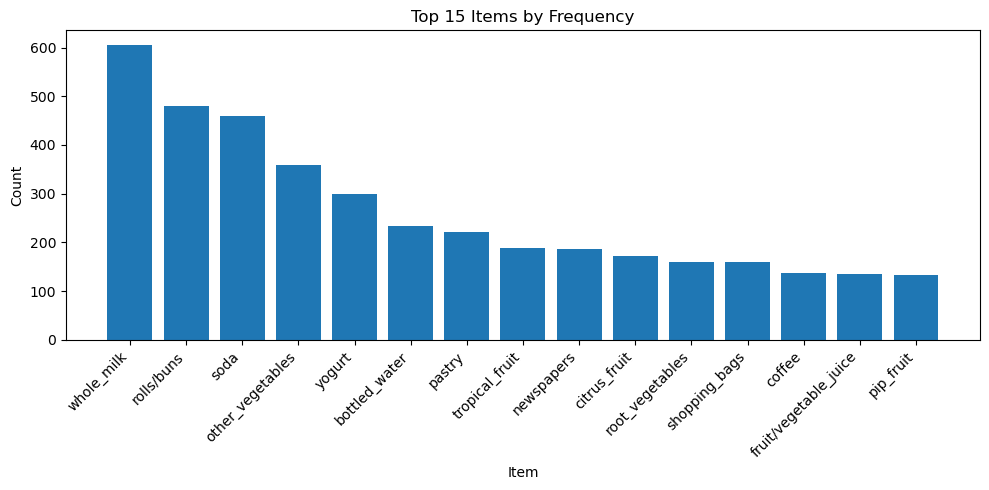

In [597]:
top_items = item_counts.most_common(15)
labels, counts = zip(*top_items)

plt.figure(figsize=(10, 5))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha='right')
plt.title(f"Top 15 Items by Frequency")
plt.ylabel("Count")
plt.xlabel("Item")
plt.tight_layout()
plt.show()

In [598]:
l_pairs, c_pairs = zip(*pairs_K)

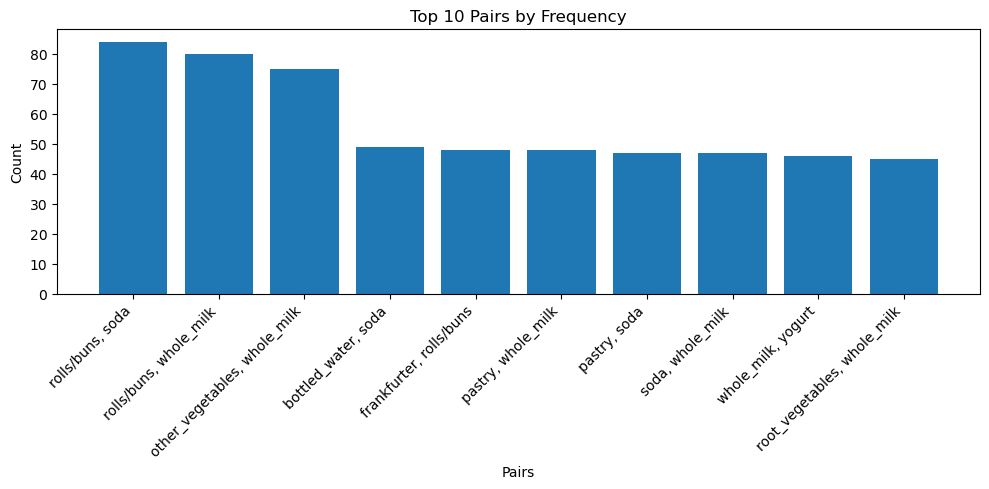

In [599]:
labels = [", ".join(p) for p in l_pairs]

plt.figure(figsize=(10,5))
plt.bar(labels, c_pairs)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Pairs by Frequency")
plt.ylabel("Count")
plt.xlabel("Pairs")
plt.tight_layout()
plt.show()

In [600]:
top_25_i = item_counts.most_common(25)

In [601]:
top_25_i

[('whole_milk', 605),
 ('rolls/buns', 480),
 ('soda', 460),
 ('other_vegetables', 359),
 ('yogurt', 299),
 ('bottled_water', 234),
 ('pastry', 221),
 ('tropical_fruit', 188),
 ('newspapers', 186),
 ('citrus_fruit', 171),
 ('root_vegetables', 159),
 ('shopping_bags', 159),
 ('coffee', 138),
 ('fruit/vegetable_juice', 136),
 ('pip_fruit', 134),
 ('frankfurter', 133),
 ('brown_bread', 133),
 ('whipped/sour_cream', 123),
 ('chocolate', 103),
 ('margarine', 101),
 ('domestic_eggs', 100),
 ('specialty_chocolate', 98),
 ('curd', 93),
 ('specialty_bar', 91),
 ('beef', 91)]

In [602]:
top25 = [x[0] for x in top_25_i]
idx = {item:i for i, item in enumerate(top25)}
topset = set(top25)

In [630]:
from itertools import combinations_with_replacement
M = np.zeros((25, 25), dtype=int)

for basket in data['items']:
    b = sorted(topset.intersection(basket))
    for a, b_ in combinations_with_replacement(b, 2):
        i, j = idx[a], idx[b_]
        if i == j:
            continue
        M[i, j] += 1
        M[j,i] += 1


cooc = pd.DataFrame(M, index=top_25_i, columns=top_25_i)

IndexError: index 77 is out of bounds for axis 1 with size 25

In [631]:
cooc

,"(whole_milk, 605)","(rolls/buns, 480)","(soda, 460)","(other_vegetables, 359)","(yogurt, 299)","(bottled_water, 234)","(pastry, 221)","(tropical_fruit, 188)","(newspapers, 186)","(citrus_fruit, 171)",...,"(frankfurter, 133)","(brown_bread, 133)","(whipped/sour_cream, 123)","(chocolate, 103)","(margarine, 101)","(domestic_eggs, 100)","(specialty_chocolate, 98)","(curd, 93)","(specialty_bar, 91)","(beef, 91)"
"(whole_milk, 605)",0,80,47,75,46,43,48,36,42,26,...,24,32,26,13,26,23,9,23,9,21
"(rolls/buns, 480)",80,0,84,37,40,33,32,24,30,17,...,48,24,8,11,10,17,11,6,14,11
"(soda, 460)",47,84,0,32,18,49,47,10,15,9,...,19,7,5,20,9,9,19,8,25,5
"(other_vegetables, 359)",75,37,32,0,36,12,9,28,14,32,...,10,9,21,10,13,10,3,6,5,24
"(yogurt, 299)",46,40,18,36,0,20,13,23,18,18,...,6,10,19,10,10,7,5,18,8,10
"(bottled_water, 234)",43,33,49,12,20,0,11,13,14,9,...,6,8,5,5,7,5,8,7,5,2
"(pastry, 221)",48,32,47,9,13,11,0,8,13,9,...,3,8,5,7,7,9,3,4,7,3
"(tropical_fruit, 188)",36,24,10,28,23,13,8,0,12,22,...,4,10,7,6,4,4,2,5,1,4
"(newspapers, 186)",42,30,15,14,18,14,13,12,0,8,...,8,6,8,1,5,5,4,6,4,5
"(citrus_fruit, 171)",26,17,9,32,18,9,9,22,8,0,...,5,3,4,0,3,7,2,8,4,8


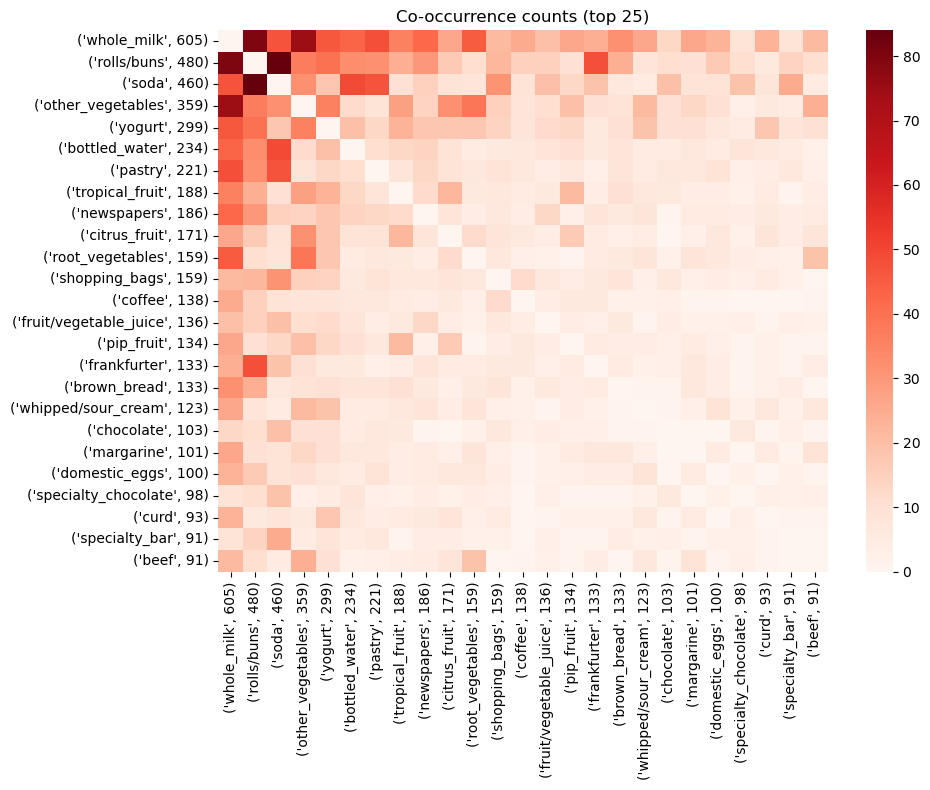

In [604]:
import matplotlib as mpl
plt.figure(figsize=(10, 8))
sns.heatmap(cooc, cmap='Reds')
plt.title("Co-occurrence counts (top 25)")
plt.tight_layout()
plt.show()

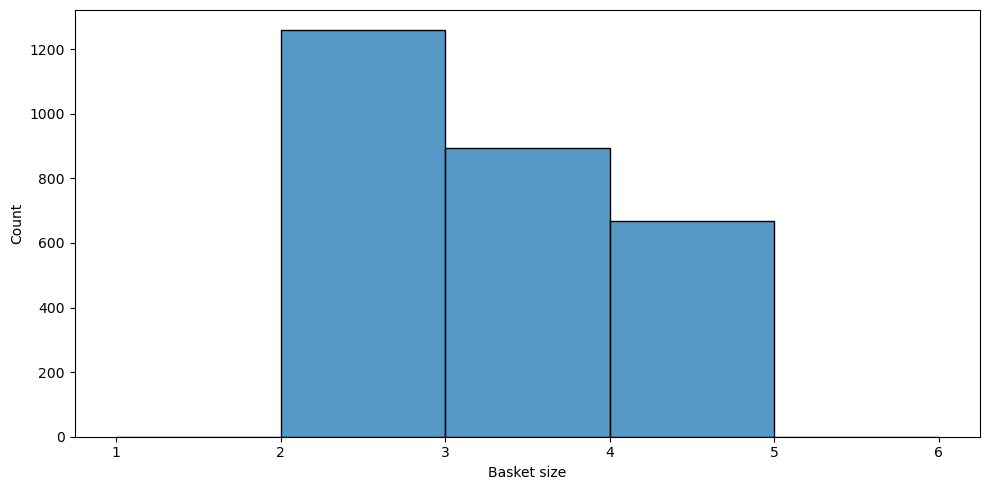

In [605]:
plt.figure(figsize = (10,5))
sns.histplot(data = basket_size,bins=np.arange(1,7))
plt.xlabel('Basket size')
plt.ylabel('Count')
plt.tight_layout()

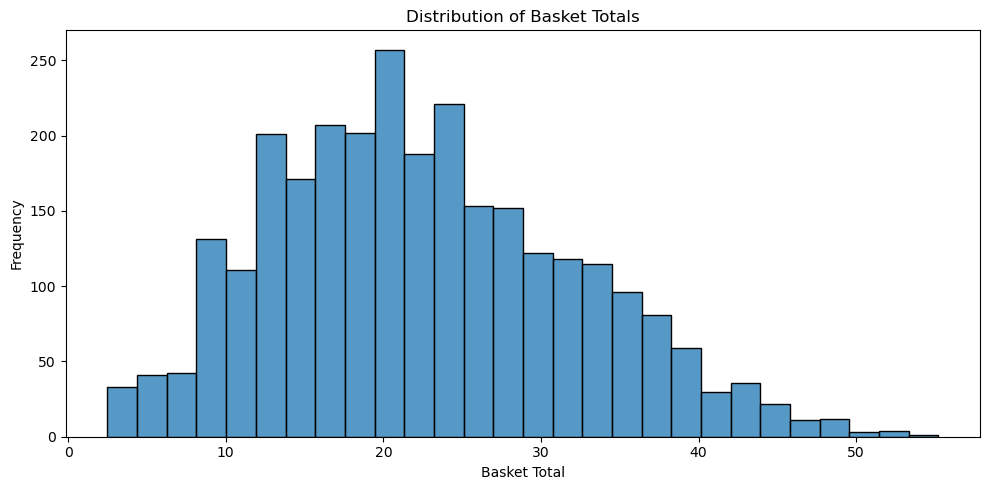

In [606]:
plt.figure(figsize=(10,5))
sns.histplot(data['basket_total'])
plt.xlabel('Basket Total')
plt.ylabel('Frequency')
plt.title('Distribution of Basket Totals')
plt.tight_layout()

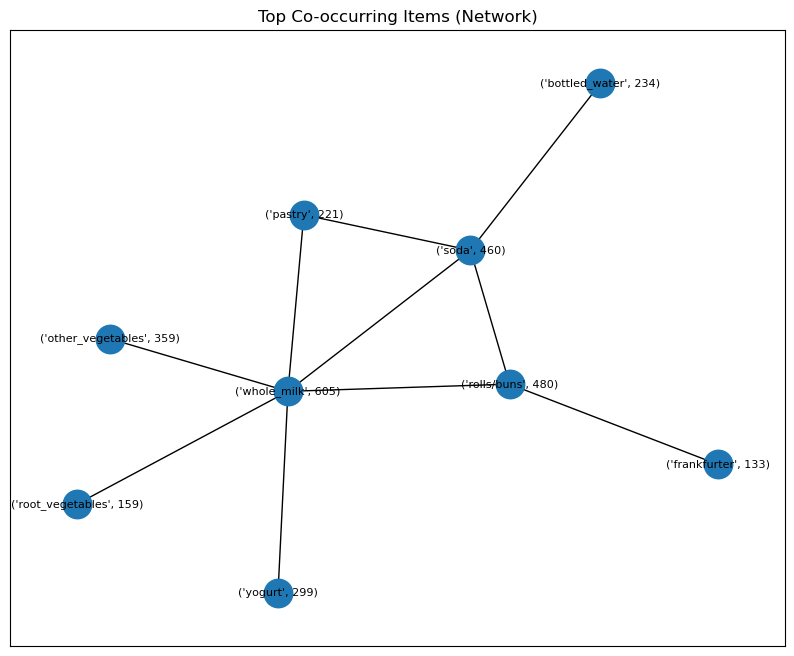

In [607]:
W = cooc.values.astype(float)

labels = cooc.index.tolist()

tri = np.triu_indices_from(W, k=1)

edges = [(labels[i], labels[j], W[i, j]) for i, j in zip(*tri) if W[i, j] > 0]

edges.sort(key=lambda x: x[2], reverse=True)
edges = edges[:K]

G = nx.Graph()
G.add_weighted_edges_from(edges)                                 

pos = nx.spring_layout(G, seed=RANDOMSEED)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=420)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos)
plt.title("Top Co-occurring Items (Network)")
plt.show()

In [634]:

ind_counts = Counter()
def counts(row):
    ind = list(combinations(sorted(set(row)),1))
    ind_counts.update(ind)

data['items'].map(counts, na_action = "ignore")
ind_counts

Counter({('whole_milk',): 605,
         ('rolls/buns',): 480,
         ('soda',): 460,
         ('other_vegetables',): 359,
         ('yogurt',): 299,
         ('bottled_water',): 234,
         ('pastry',): 221,
         ('tropical_fruit',): 188,
         ('newspapers',): 186,
         ('citrus_fruit',): 171,
         ('root_vegetables',): 159,
         ('shopping_bags',): 159,
         ('coffee',): 138,
         ('fruit/vegetable_juice',): 136,
         ('pip_fruit',): 134,
         ('frankfurter',): 133,
         ('brown_bread',): 133,
         ('whipped/sour_cream',): 123,
         ('chocolate',): 103,
         ('margarine',): 101,
         ('domestic_eggs',): 100,
         ('specialty_chocolate',): 98,
         ('curd',): 93,
         ('specialty_bar',): 91,
         ('beef',): 91,
         ('napkins',): 90,
         ('butter',): 84,
         ('long_life_bakery_product',): 81,
         ('cream_cheese',): 78,
         ('waffles',): 76,
         ('chicken',): 75,
         ('beverages

In [635]:
ind_frac = [{i:num/len(data)}for i,num in ind_counts.items()]
ind_frac

[{('citrus_fruit',): 0.06063829787234042},
 {('margarine',): 0.035815602836879436},
 {('ready_soups',): 0.0003546099290780142},
 {('semi-finished_bread',): 0.009929078014184398},
 {('coffee',): 0.04893617021276596},
 {('tropical_fruit',): 0.06666666666666667},
 {('yogurt',): 0.10602836879432624},
 {('cream_cheese',): 0.027659574468085105},
 {('meat_spreads',): 0.00425531914893617},
 {('pip_fruit',): 0.0475177304964539},
 {('condensed_milk',): 0.009219858156028368},
 {('long_life_bakery_product',): 0.02872340425531915},
 {('other_vegetables',): 0.12730496453900708},
 {('whole_milk',): 0.21453900709219859},
 {('cereals',): 0.003900709219858156},
 {('frankfurter',): 0.047163120567375885},
 {('rolls/buns',): 0.1702127659574468},
 {('soda',): 0.16312056737588654},
 {('chicken',): 0.026595744680851064},
 {('butter',): 0.029787234042553193},
 {('fruit/vegetable_juice',): 0.04822695035460993},
 {('newspapers',): 0.06595744680851064},
 {('sugar',): 0.018085106382978722},
 {('butter_milk',): 0.0

In [610]:
support_A = (
    pd.Series({k[0]: v for d in ind_frac for k, v in d.items()})
      .sort_index()
)
N = len(transactions) 

In [611]:
items = support_A.index.tolist()
idx = {item:i for i,item in enumerate(items)}
S = np.zeros((len(items), len(items)), float)

for (a,b), s in frac_pair.items():  
    if a in idx and b in idx:
        i, j = idx[a], idx[b]
        S[i, j] = s
        S[j, i] = s               

support_AB = pd.DataFrame(S, index=items, columns=items)

In [612]:
support_AB

,abrasive_cleaner,artif._sweetener,baby_cosmetics,baking_powder,bathroom_cleaner,beef,berries,beverages,bottled_water,brown_bread,...,tropical_fruit,turkey,uht-milk,vinegar,waffles,whipped/sour_cream,white_bread,whole_milk,yogurt,zwieback
abrasive_cleaner,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000355,0.000000,0.000000,0.000355,0.000000
artif._sweetener,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000355,0.000000,...,0.000000,0.000000,0.000709,0.000000,0.000000,0.000000,0.000000,0.000355,0.000709,0.000000
baby_cosmetics,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
baking_powder,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000709,0.000000,...,0.000355,0.000000,0.000355,0.000000,0.000355,0.001064,0.000355,0.002128,0.000355,0.000000
bathroom_cleaner,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000355,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whipped/sour_cream,0.000355,0.000000,0.0,0.001064,0.000000,0.002482,0.005319,0.000355,0.001773,0.000355,...,0.002482,0.000000,0.000355,0.000000,0.000709,0.000000,0.000709,0.009220,0.006738,0.000000
white_bread,0.000000,0.000000,0.0,0.000355,0.000000,0.001064,0.000355,0.000000,0.000355,0.002128,...,0.000709,0.000000,0.000000,0.000000,0.000709,0.000709,0.000000,0.006028,0.001418,0.000000
whole_milk,0.000000,0.000355,0.0,0.002128,0.000000,0.007447,0.001773,0.004610,0.015248,0.011348,...,0.012766,0.000709,0.001064,0.000355,0.002482,0.009220,0.006028,0.000000,0.016312,0.000709
yogurt,0.000355,0.000709,0.0,0.000355,0.000355,0.003546,0.006028,0.003191,0.007092,0.003546,...,0.008156,0.000355,0.001773,0.000355,0.002482,0.006738,0.001418,0.016312,0.000000,0.000000


In [613]:
Confidence = support_AB.div(support_A, axis=0).fillna(0.0)
np.fill_diagonal(Confidence.values, 0.0)

Lift = Confidence.div(support_A, axis=1).fillna(0.0)
np.fill_diagonal(Lift.values, 0.0)


In [614]:
Confidence

,abrasive_cleaner,artif._sweetener,baby_cosmetics,baking_powder,bathroom_cleaner,beef,berries,beverages,bottled_water,brown_bread,...,tropical_fruit,turkey,uht-milk,vinegar,waffles,whipped/sour_cream,white_bread,whole_milk,yogurt,zwieback
abrasive_cleaner,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000
artif._sweetener,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,...,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.285714,0.000000
baby_cosmetics,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
baking_powder,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.000000,...,0.043478,0.000000,0.043478,0.000000,0.043478,0.130435,0.043478,0.260870,0.043478,0.000000
bathroom_cleaner,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whipped/sour_cream,0.008130,0.000000,0.0,0.024390,0.000000,0.056911,0.121951,0.008130,0.040650,0.008130,...,0.056911,0.000000,0.008130,0.000000,0.016260,0.000000,0.016260,0.211382,0.154472,0.000000
white_bread,0.000000,0.000000,0.0,0.014493,0.000000,0.043478,0.014493,0.000000,0.014493,0.086957,...,0.028986,0.000000,0.000000,0.000000,0.028986,0.028986,0.000000,0.246377,0.057971,0.000000
whole_milk,0.000000,0.001653,0.0,0.009917,0.000000,0.034711,0.008264,0.021488,0.071074,0.052893,...,0.059504,0.003306,0.004959,0.001653,0.011570,0.042975,0.028099,0.000000,0.076033,0.003306
yogurt,0.003344,0.006689,0.0,0.003344,0.003344,0.033445,0.056856,0.030100,0.066890,0.033445,...,0.076923,0.003344,0.016722,0.003344,0.023411,0.063545,0.013378,0.153846,0.000000,0.000000


In [615]:
Lift

,abrasive_cleaner,artif._sweetener,baby_cosmetics,baking_powder,bathroom_cleaner,beef,berries,beverages,bottled_water,brown_bread,...,tropical_fruit,turkey,uht-milk,vinegar,waffles,whipped/sour_cream,white_bread,whole_milk,yogurt,zwieback
abrasive_cleaner,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.731707,0.000000,0.000000,2.357860,0.000000
artif._sweetener,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.721612,0.000000,...,0.000000,0.000000,12.207792,0.000000,0.000000,0.000000,0.000000,0.665880,2.694697,0.000000
baby_cosmetics,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
baking_powder,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.047938,0.000000,...,0.652174,0.000000,1.857708,0.000000,1.613272,2.990456,1.776938,1.215954,0.410063,0.000000
bathroom_cleaner,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.143813,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whipped/sour_cream,5.731707,0.000000,0.0,2.990456,0.000000,1.763602,5.929352,0.305691,0.489890,0.172382,...,0.853659,0.000000,0.347376,0.000000,0.603338,0.000000,0.664546,0.985285,1.456889,0.000000
white_bread,0.000000,0.000000,0.0,1.776938,0.000000,1.347348,0.704648,0.000000,0.174656,1.843740,...,0.434783,0.000000,0.000000,0.000000,1.075515,0.664546,0.000000,1.148401,0.546750,0.000000
whole_milk,0.000000,0.665880,0.0,1.215954,0.000000,1.075652,0.401824,0.807934,0.856537,1.121481,...,0.892562,1.035813,0.211871,0.517906,0.429317,0.985285,1.148401,0.000000,0.717101,0.517906
yogurt,2.357860,2.694697,0.0,0.410063,3.143813,1.036422,2.764387,1.131773,0.806106,0.709131,...,1.153846,1.047938,0.714503,1.047938,0.868685,1.456889,0.546750,0.717101,0.000000,0.000000


In [616]:
top_conf = (Confidence.stack()
            .sort_values(ascending=False)
            .head(30))

top_lift = (Lift.stack()
            .sort_values(ascending=False)
            .head(30))


In [617]:
top_conf

toilet_cleaner    root_vegetables          1.00
baby_cosmetics    shopping_bags            1.00
salad_dressing    turkey                   1.00
toilet_cleaner    beef                     1.00
make_up_remover   fruit/vegetable_juice    1.00
frozen_chicken    salty_snack              1.00
toilet_cleaner    jam                      1.00
ready_soups       semi-finished_bread      1.00
salad_dressing    pip_fruit                1.00
                  pastry                   1.00
ready_soups       margarine                1.00
make_up_remover   canned_fish              1.00
baby_cosmetics    citrus_fruit             1.00
                  cake_bar                 1.00
ready_soups       citrus_fruit             1.00
pudding_powder    whole_milk               1.00
cocoa_drinks      whole_milk               0.75
nuts/prunes       soda                     0.60
cream             other_vegetables         0.50
rice              whole_milk               0.50
frozen_fruits     detergent             

In [618]:
top_lift

toilet_cleaner          jam                       313.333333
salad_dressing          turkey                    313.333333
jam                     toilet_cleaner            313.333333
turkey                  salad_dressing            313.333333
softener                organic_products          141.000000
organic_products        softener                  141.000000
curd_cheese             abrasive_cleaner          141.000000
abrasive_cleaner        curd_cheese               141.000000
kitchen_towels          spices                    134.285714
spices                  kitchen_towels            134.285714
canned_fish             make_up_remover           112.800000
make_up_remover         canned_fish               112.800000
semi-finished_bread     ready_soups               100.714286
ready_soups             semi-finished_bread       100.714286
baby_cosmetics          cake_bar                  100.714286
cake_bar                baby_cosmetics            100.714286
cocoa_drinks            

In [619]:
data['1_price_mod'] = data['item_1_price']*rng.uniform(0.9, 1.1, size=len(data))
data['2_price_mod'] = data['item_2_price']*rng.uniform(0.9, 1.1, size=len(data))
data['3_price_mod'] = data['item_3_price']*rng.uniform(0.9, 1.1, size=len(data))
data['4_price_mod'] = data['item_4_price']*rng.uniform(0.9, 1.1, size=len(data))

In [620]:
cols = ['1_price_mod', '2_price_mod', '3_price_mod', '4_price_mod']
data['basket_total_mod'] = data[cols].sum(axis=1, skipna=True)

In [633]:
ind_counts

Counter({('whole_milk',): 605,
         ('rolls/buns',): 480,
         ('soda',): 460,
         ('other_vegetables',): 359,
         ('yogurt',): 299,
         ('bottled_water',): 234,
         ('pastry',): 221,
         ('tropical_fruit',): 188,
         ('newspapers',): 186,
         ('citrus_fruit',): 171,
         ('root_vegetables',): 159,
         ('shopping_bags',): 159,
         ('coffee',): 138,
         ('fruit/vegetable_juice',): 136,
         ('pip_fruit',): 134,
         ('frankfurter',): 133,
         ('brown_bread',): 133,
         ('whipped/sour_cream',): 123,
         ('chocolate',): 103,
         ('margarine',): 101,
         ('domestic_eggs',): 100,
         ('specialty_chocolate',): 98,
         ('curd',): 93,
         ('specialty_bar',): 91,
         ('beef',): 91,
         ('napkins',): 90,
         ('butter',): 84,
         ('long_life_bakery_product',): 81,
         ('cream_cheese',): 78,
         ('waffles',): 76,
         ('chicken',): 75,
         ('beverages

In [622]:
ind_frac

[{('citrus_fruit',): 0.06063829787234042},
 {('margarine',): 0.035815602836879436},
 {('ready_soups',): 0.0003546099290780142},
 {('semi-finished_bread',): 0.009929078014184398},
 {('coffee',): 0.04893617021276596},
 {('tropical_fruit',): 0.06666666666666667},
 {('yogurt',): 0.10602836879432624},
 {('cream_cheese',): 0.027659574468085105},
 {('meat_spreads',): 0.00425531914893617},
 {('pip_fruit',): 0.0475177304964539},
 {('condensed_milk',): 0.009219858156028368},
 {('long_life_bakery_product',): 0.02872340425531915},
 {('other_vegetables',): 0.12730496453900708},
 {('whole_milk',): 0.21453900709219859},
 {('cereals',): 0.003900709219858156},
 {('frankfurter',): 0.047163120567375885},
 {('rolls/buns',): 0.1702127659574468},
 {('soda',): 0.16312056737588654},
 {('chicken',): 0.026595744680851064},
 {('butter',): 0.029787234042553193},
 {('fruit/vegetable_juice',): 0.04822695035460993},
 {('newspapers',): 0.06595744680851064},
 {('sugar',): 0.018085106382978722},
 {('butter_milk',): 0.0

In [629]:
top_lift

toilet_cleaner          jam                       313.333333
salad_dressing          turkey                    313.333333
jam                     toilet_cleaner            313.333333
turkey                  salad_dressing            313.333333
softener                organic_products          141.000000
organic_products        softener                  141.000000
curd_cheese             abrasive_cleaner          141.000000
abrasive_cleaner        curd_cheese               141.000000
kitchen_towels          spices                    134.285714
spices                  kitchen_towels            134.285714
canned_fish             make_up_remover           112.800000
make_up_remover         canned_fish               112.800000
semi-finished_bread     ready_soups               100.714286
ready_soups             semi-finished_bread       100.714286
baby_cosmetics          cake_bar                  100.714286
cake_bar                baby_cosmetics            100.714286
cocoa_drinks            

In [632]:
triples_K

[(('other_vegetables', 'root_vegetables', 'whole_milk'), 8),
 (('other_vegetables', 'soda', 'whole_milk'), 7),
 (('beef', 'root_vegetables', 'whole_milk'), 6),
 (('citrus_fruit', 'pip_fruit', 'tropical_fruit'), 6),
 (('frankfurter', 'rolls/buns', 'soda'), 6),
 (('newspapers', 'pastry', 'whole_milk'), 6),
 (('other_vegetables', 'rolls/buns', 'whole_milk'), 6),
 (('other_vegetables', 'whole_milk', 'yogurt'), 6),
 (('pastry', 'rolls/buns', 'soda'), 6),
 (('berries', 'whipped/sour_cream', 'yogurt'), 5)]